# Ames Housing Data

The main purpose of this data science project is to predict the home prices in Ames, Iowa by using regression models. By doing this data analysis, we can find the theoretical relationship have in mind. Probably, there is specific interest in the magnitudes and signs of the coefficients. Throughout the iterative modeling and feature selection processes manually and automatedly, we can gain a deeper insight into 80 variables which were directly related to property sales and understand better the mechanism behind various models.

**Problem Statement**
>As a real estate investor acquires an investment property and holds it for more than a year, it’s thought of as a Buy and Hold investment. Their investment return assessment includes renting that investment property while it’s held to improve their profits.So when you know the right time It would be the best choice.

In order to understand the dataset easier, please review the data description by the following link http://jse.amstat.org/v19n3/decock/DataDocumentation.txt


## Data Cleaning and EDA

In [1]:
#conda install -c conda-forge sklearn-pandas

In [2]:
import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler, LabelBinarizer

import warnings

import pickle

import csv

import time

import re

from sklearn_pandas import DataFrameMapper

from sklearn_pandas import gen_features

from sklearn import metrics

warnings.filterwarnings('ignore')

%matplotlib inline

In [43]:
# Loading the data

train = pd.read_csv('datasets/train.csv', na_values = "", keep_default_na = False)

test = pd.read_csv('datasets/test.csv', na_values = "", keep_default_na = False)

In [44]:
train.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900


In [45]:
test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal


In [46]:
train.shape

(2197, 82)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

In [48]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2197.0,1.460513e+03,8.465373e+02,1.0,7.330000e+02,1452.0,2.196000e+03,2.929000e+03
PID,2197.0,7.127872e+08,1.887751e+08,526301100.0,5.284410e+08,535453150.0,9.071811e+08,1.007100e+09
MS SubClass,2197.0,5.706418e+01,4.236069e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,1835.0,6.954932e+01,2.318822e+01,21.0,5.850000e+01,69.0,8.000000e+01,3.130000e+02
Lot Area,2197.0,1.026807e+04,7.975741e+03,1300.0,7.500000e+03,9488.0,1.166000e+04,2.152450e+05
Overall Qual,2197.0,6.116523e+00,1.429613e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2197.0,5.552572e+00,1.107019e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2197.0,1.972031e+03,3.045007e+01,1872.0,1.954000e+03,1975.0,2.002000e+03,2.010000e+03
Year Remod/Add,2197.0,1.984781e+03,2.089825e+01,1950.0,1.966000e+03,1994.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2175.0,1.051016e+02,1.848972e+02,0.0,0.000000e+00,0.0,1.660000e+02,1.600000e+03


### Missing Values

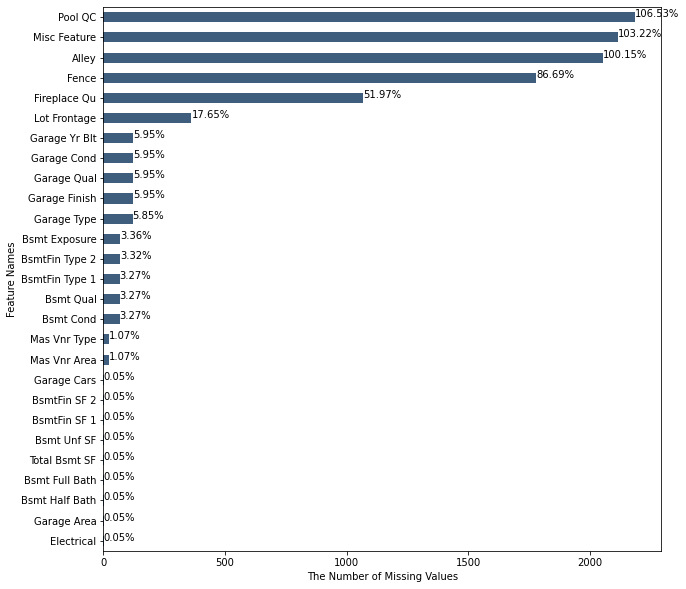

In [49]:
# Nan is the list of features, have null values

Nan = train.isnull().sum()[train.isnull().sum()>0] # Sum all columns > 0 in train

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()): #sort value Nan to be %
    
    plt.annotate(str(round(x/2051*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

#### Relationship between Lot Frontage and Lot Area

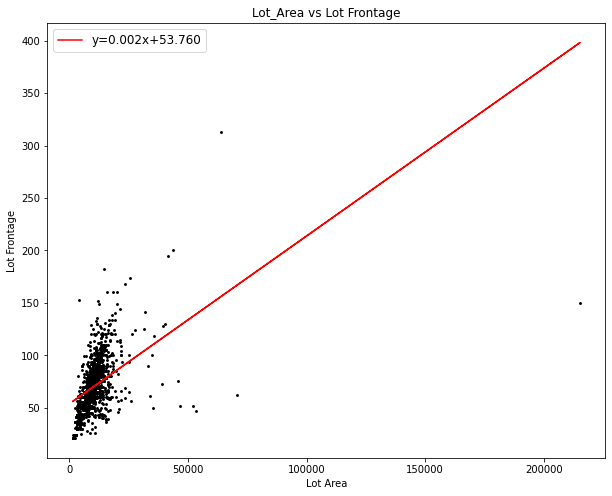

In [50]:
mask = train['Lot Frontage'].isnull() == False

Lot_x = train[mask]['Lot Area']

Lot_y = train[mask]['Lot Frontage']

slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x,Lot_y) # Reference: stats model libraray

line = slope*Lot_x+intercept

plt.figure(figsize=(10,8))

plt.plot(Lot_x, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept)); # Metric to predict Lot Frontage

plt.scatter(Lot_x,Lot_y, color="k", s=3.5)

plt.legend(fontsize = 12)

plt.xlabel('Lot Area')

plt.ylabel('Lot Frontage')

plt.title('Lot_Area vs Lot Frontage');

As the graph above, we can see that Lot Frontage and Lot Area have a relatively linear relationship 

In [51]:
# Lot Frontage Y = AX+ C
train['Lot Frontage'] = train.apply(lambda row: round(row['Lot Area']*0.003 +43.332,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

#### Fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house.

In [52]:
# When Garage Yr Blt is done, Year Built is done also
train['Garage Yr Blt'] = train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

#### Based on the data description, there are many columns that containing NA which are not the actual missing values but the 'None' of these features. Numerical features containing an NA will be set to 0, categorical features containing an NA will be set to string value 'None'.

In [53]:
# Checking columns contain missing values

train.isnull().sum()[train.isnull().sum()>0]

Alley             2054
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           67
Bsmt Cond           67
Bsmt Exposure       69
BsmtFin Type 1      67
BsmtFin SF 1         1
BsmtFin Type 2      68
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       1
Bsmt Half Bath       1
Fireplace Qu      1066
Garage Type        120
Garage Finish      122
Garage Cars          1
Garage Area          1
Garage Qual        122
Garage Cond        122
Pool QC           2185
Fence             1778
Misc Feature      2117
dtype: int64

In [54]:
train.fillna(train[['Garage Finish','Garage Qual','Garage Cond',
                    'Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']].fillna('None'),inplace=True)

train.fillna(train[['Bsmt Half Bath','Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2',
                    'Bsmt Unf SF','Total Bsmt SF','Mas Vnr Area','Garage Cars',
                    'Garage Area']].fillna(0),inplace=True)

In [55]:
# Double check missing values

train.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

## Exploratory Data Analysis and Cleaning

#### Let's look at the distribution of the target variable SalePrice and Ground Living Area vs SalePrice

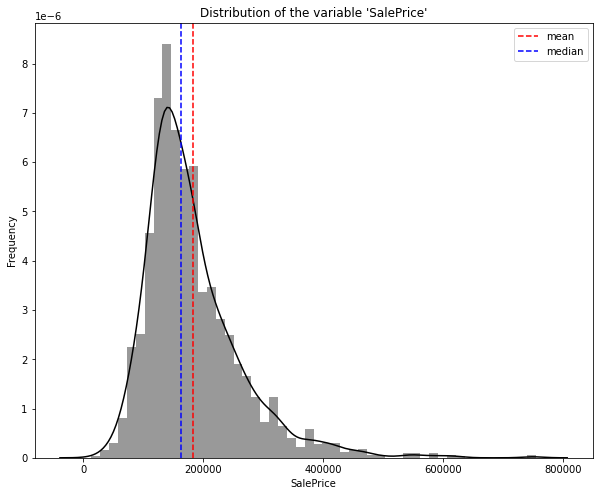

In [56]:
plt.figure(figsize=(10,8))

sns.distplot(train['SalePrice'], color="black")

plt.ylabel('Frequency')

plt.title("Distribution of the variable 'SalePrice'")

plt.axvline(train['SalePrice'].mean(), linestyle = '--', color = 'r', label ='mean')

plt.axvline(train['SalePrice'].median(), linestyle = '--', color = 'b', label ='median')

plt.legend();

The distribution of the `SalePrice` is right-skewed, the outliers can be observed in the data. Drop the rows that `SalePrice` lower than <`$20000` and higher than >`$600000`.

In [57]:
train[(train['SalePrice'] < 20000)|(train['SalePrice'] > 600000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
30,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
177,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
934,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
989,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,13100
1714,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
1852,2446,528320060,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [58]:
# Drop SalesPrice < 20000 & SalesPrice > 600000

train.drop(train[(train['SalePrice'] < 20000)|(train['SalePrice'] > 600000)].index,0,inplace=True)

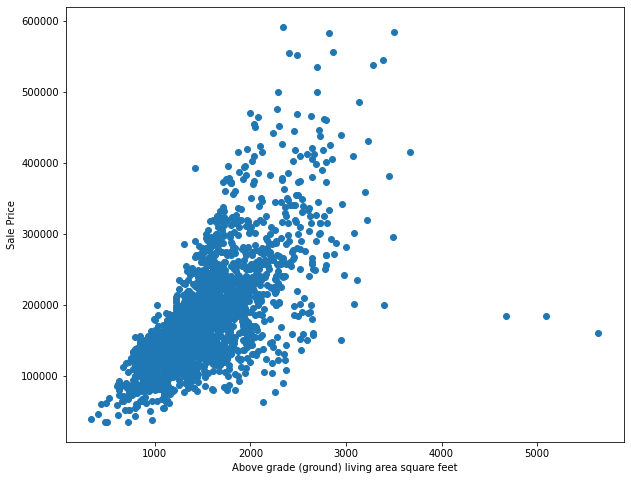

In [59]:
plt.figure(figsize=(10,8))

plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'])

plt.xlabel('Above grade (ground) living area square feet')

plt.ylabel('Sale Price')

plt.show()

In [60]:
train['SalePrice']

0       159000
1       271900
2       137500
3       248500
4       167000
         ...  
2192    220000
2193    160000
2194    225000
2195     83000
2196    250000
Name: SalePrice, Length: 2191, dtype: int64

In [61]:
# selling price in log

train['SalePrice'] = np.log(train['SalePrice'])

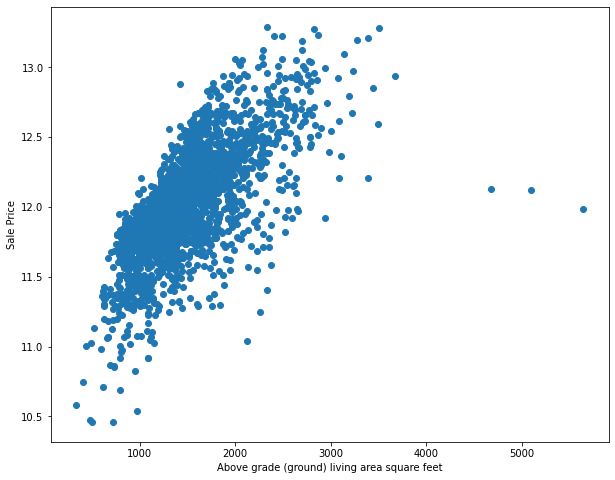

In [62]:
plt.figure(figsize=(10,8))

plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'])

plt.xlabel('Above grade (ground) living area square feet')

plt.ylabel('Sale Price')

plt.show()

In [63]:
# Drop some observations which have more than 4000 sq_ft of living area and less than 10 $ of SalesPrice.

train.drop(train[train['Gr Liv Area'] > 4000].index, inplace = True)

train.drop(train[train['SalePrice'] < 10].index, inplace = True)

**Now, we will do the same thing with test dataset.**

In [64]:
test.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial


In [65]:
test.shape

(733, 81)

In [66]:
# Checking missing values for each column
test.isnull().sum()[test.isnull().sum()>0]

Lot Frontage      128
Alley             678
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          13
Bsmt Cond          13
Bsmt Exposure      14
BsmtFin Type 1     13
BsmtFin Type 2     13
Bsmt Full Bath      1
Bsmt Half Bath      1
Fireplace Qu      356
Garage Type        37
Garage Yr Blt      37
Garage Finish      37
Garage Qual        37
Garage Cond        37
Pool QC           732
Fence             580
Misc Feature      707
dtype: int64

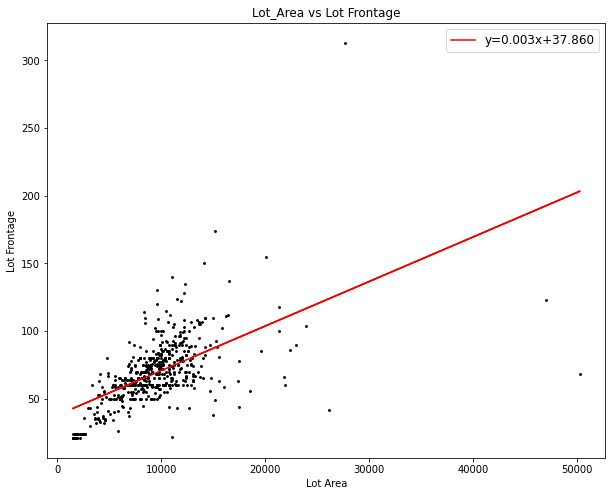

In [67]:
mask_test = test['Lot Frontage'].isnull() == False

Lot_x_test = test[mask_test]['Lot Area']

Lot_y_test = test[mask_test]['Lot Frontage']

slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x_test,Lot_y_test) # reference: stats model libraray

line = slope*Lot_x_test+intercept

plt.figure(figsize=(10,8))

plt.plot(Lot_x_test, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept));

plt.scatter(Lot_x_test,Lot_y_test, color="k", s=3.5)

plt.legend(fontsize = 12)

plt.xlabel('Lot Area')

plt.ylabel('Lot Frontage')

plt.title('Lot_Area vs Lot Frontage');

In [68]:
# Find Lot Frontage = LotArea**2
# https://www.kaggle.com/code/ogakulov/lotfrontage-fill-in-missing-values-house-prices
  

test['Lot Frontage'] = test.apply(lambda row: round(row['Lot Area']*0.001 +58.445,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

In [69]:
# Checking missing values for each column again
test.isnull().sum()[test.isnull().sum()>0]

Alley             678
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          13
Bsmt Cond          13
Bsmt Exposure      14
BsmtFin Type 1     13
BsmtFin Type 2     13
Bsmt Full Bath      1
Bsmt Half Bath      1
Fireplace Qu      356
Garage Type        37
Garage Yr Blt      37
Garage Finish      37
Garage Qual        37
Garage Cond        37
Pool QC           732
Fence             580
Misc Feature      707
dtype: int64

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            733 non-null    int64  
 1   PID              733 non-null    int64  
 2   MS SubClass      733 non-null    int64  
 3   MS Zoning        733 non-null    object 
 4   Lot Frontage     733 non-null    float64
 5   Lot Area         733 non-null    int64  
 6   Street           733 non-null    object 
 7   Alley            55 non-null     object 
 8   Lot Shape        733 non-null    object 
 9   Land Contour     733 non-null    object 
 10  Utilities        733 non-null    object 
 11  Lot Config       733 non-null    object 
 12  Land Slope       733 non-null    object 
 13  Neighborhood     733 non-null    object 
 14  Condition 1      733 non-null    object 
 15  Condition 2      733 non-null    object 
 16  Bldg Type        733 non-null    object 
 17  House Style     

#### Fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house

In [71]:
# If Garage Yr Blt is done on which year It mean Year Built is done also

test['Garage Yr Blt'] = test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [72]:
test['Electrical'].value_counts()

SBrkr    662
FuseA     57
FuseF     12
FuseP      2
Name: Electrical, dtype: int64

In [73]:
# Numerric fill 0 and object fill None

test.fillna(train[['Mas Vnr Type', 'Electrical', 'Garage Finish']].fillna('None'),inplace=True)

test.fillna(train[['Mas Vnr Area']].fillna(0),inplace=True)


In [74]:
test['Electrical'].value_counts()

SBrkr    662
FuseA     57
FuseF     12
FuseP      2
Name: Electrical, dtype: int64

In [75]:
# Checking missing values again

test.isnull().sum().sum()

3232

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2188 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2188 non-null   int64  
 1   PID              2188 non-null   int64  
 2   MS SubClass      2188 non-null   int64  
 3   MS Zoning        2188 non-null   object 
 4   Lot Frontage     2188 non-null   float64
 5   Lot Area         2188 non-null   int64  
 6   Street           2188 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2188 non-null   object 
 9   Land Contour     2188 non-null   object 
 10  Utilities        2188 non-null   object 
 11  Lot Config       2188 non-null   object 
 12  Land Slope       2188 non-null   object 
 13  Neighborhood     2188 non-null   object 
 14  Condition 1      2188 non-null   object 
 15  Condition 2      2188 non-null   object 
 16  Bldg Type        2188 non-null   object 
 17  House Style   

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            733 non-null    int64  
 1   PID              733 non-null    int64  
 2   MS SubClass      733 non-null    int64  
 3   MS Zoning        733 non-null    object 
 4   Lot Frontage     733 non-null    float64
 5   Lot Area         733 non-null    int64  
 6   Street           733 non-null    object 
 7   Alley            55 non-null     object 
 8   Lot Shape        733 non-null    object 
 9   Land Contour     733 non-null    object 
 10  Utilities        733 non-null    object 
 11  Lot Config       733 non-null    object 
 12  Land Slope       733 non-null    object 
 13  Neighborhood     733 non-null    object 
 14  Condition 1      733 non-null    object 
 15  Condition 2      733 non-null    object 
 16  Bldg Type        733 non-null    object 
 17  House Style     

# Exploratory Visualizations and Pre-processing


### Exploratory Visualizations
   - Look at correlations.
   - Look at relationships to target (scatter plots for continuous, box plots for categorical).

### Pre-processing
   - One-hot encode categorical variables.
   - Train/test split  data.
   - Scale data.
   - Consider using automated feature selection.

### Categorical features vs SalePrice

In [78]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train.groupby(column).mean()['SalePrice'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['SalePrice'],order = names, ax = ax[i], color="#3F5D7D") 
        
        ax[i].set_title(f' " SalePrice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

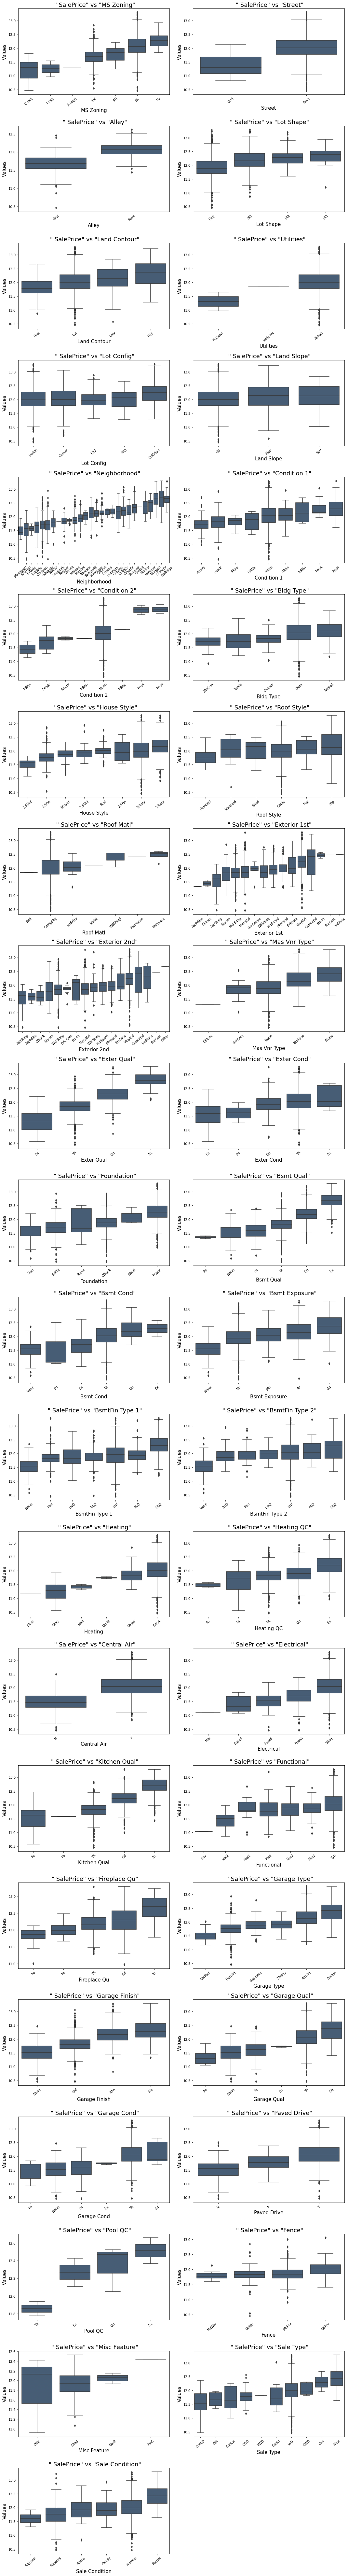

In [79]:
Catogories_columns = train.select_dtypes(include = 'object').columns

subplot_boxplot(train, Catogories_columns)

By observation on the boxplots of categorical features, the Lot Config, and Land Slope don't have linear relationships with SalePrice. Moreover, the features of Lot Config,Land Slope and Utilities can be dropped from the training dataset.

In [80]:
train.drop(['Lot Config','Land Slope','Utilities','Alley','Electrical'], axis =1, inplace=True)

## Numerical features vs SalePrice

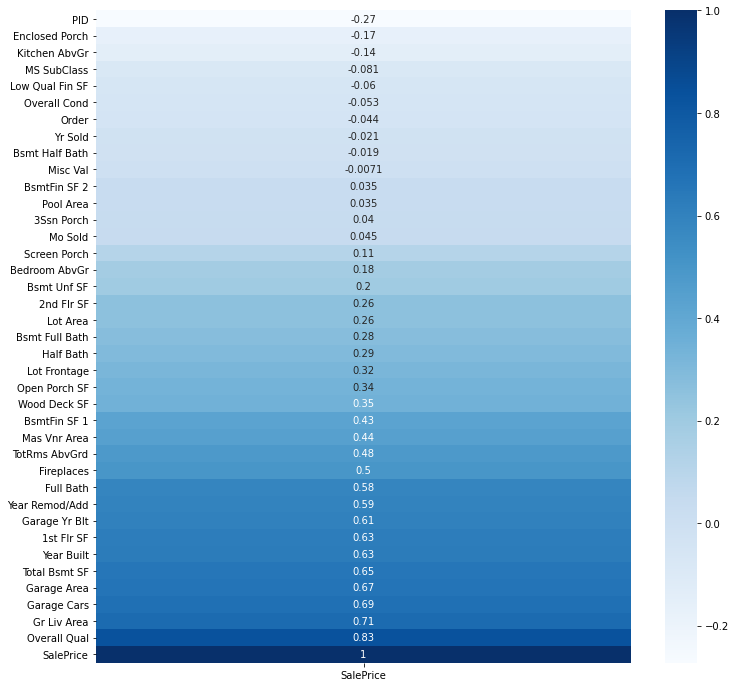

In [42]:
plt.figure(figsize = (12,12))

sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True,cmap ='Blues');

In [40]:
# Drop the irrelated data columns 
train.drop(['PID','Misc Val','Fireplaces','Fireplace Qu','Garage Type','Pool QC','Fence','Misc Feature'],axis =1, inplace=True)

#### Relationship between Total Bsmt SF and BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF

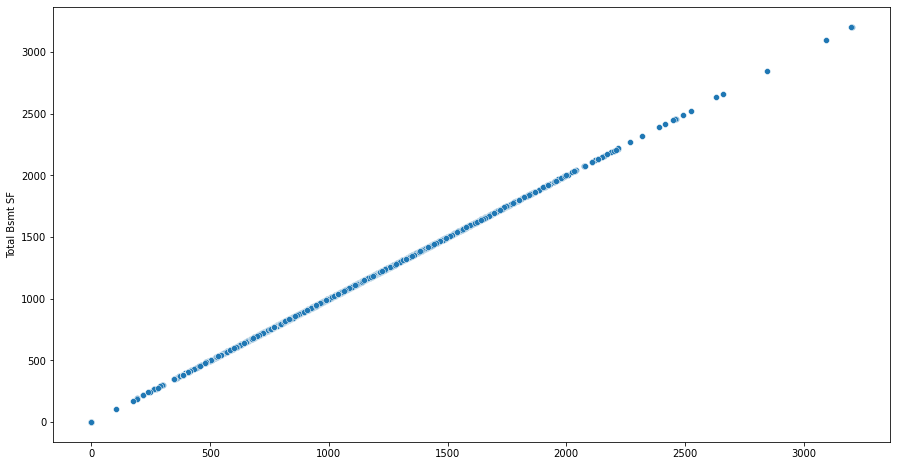

In [41]:
plt.figure(figsize=(15,8))

sns.scatterplot(train['BsmtFin SF 1']+train['BsmtFin SF 2']+train['Bsmt Unf SF'],train['Total Bsmt SF']);

Basd on observating, we can see that Total Bsmt SF = BsmtFin SF 1+ BsmtFin SF 2+ Bsmt Unf SF, so I keep only Total Bsmt SF feature

In [42]:
train.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], 1, inplace=True)

#### Relationship between Gr Liv Area and 1st Flr SF, 2nd  Flr SF, Low Qual Fin SF

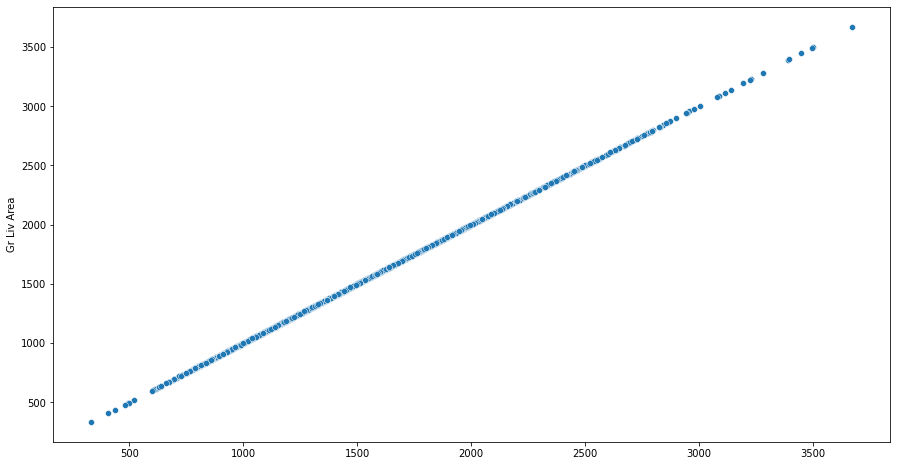

In [43]:
plt.figure(figsize=(15,8))

sns.scatterplot(train['1st Flr SF']+train['2nd Flr SF']+train['Low Qual Fin SF'],train['Gr Liv Area']);

In [44]:
# Again, I only keep "Gr Liv Area" feature

train.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], 1, inplace=True)

The scatter plot can be useful for looking at the linear relationship between the target variable and the variables which have the correlation coefficient higher than 0.25

In [45]:
def subplot_scatter(dataframe, x):
    
    nrows = int(np.ceil(len(x)/2)) # Makes sure we have enough row
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) # to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    if len(x) %2 !=0:
        
        ax[len(x)].set_visible(False)
        
    for i in range(len(x)): # Gives us an index value to get into all our lists
        
        sns.scatterplot(dataframe[x[i]],dataframe['SalePrice'] ,ax = ax[i],color="#3F5D7D") 
        
        ax[i].set_title(x[i] +' vs SalePrice', fontsize =18)
        
        ax[i].set_ylabel('SalePrice',fontsize=15)
        
        ax[i].set_xlabel(x[i],fontsize=15)
        
        ax[i].spines["top"].set_visible(False)  
        
        ax[i].spines["right"].set_visible(False) 
        
    plt.tight_layout()

In [46]:
high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

corr_features = train.corr()[['SalePrice']][high_corr][:-1].index

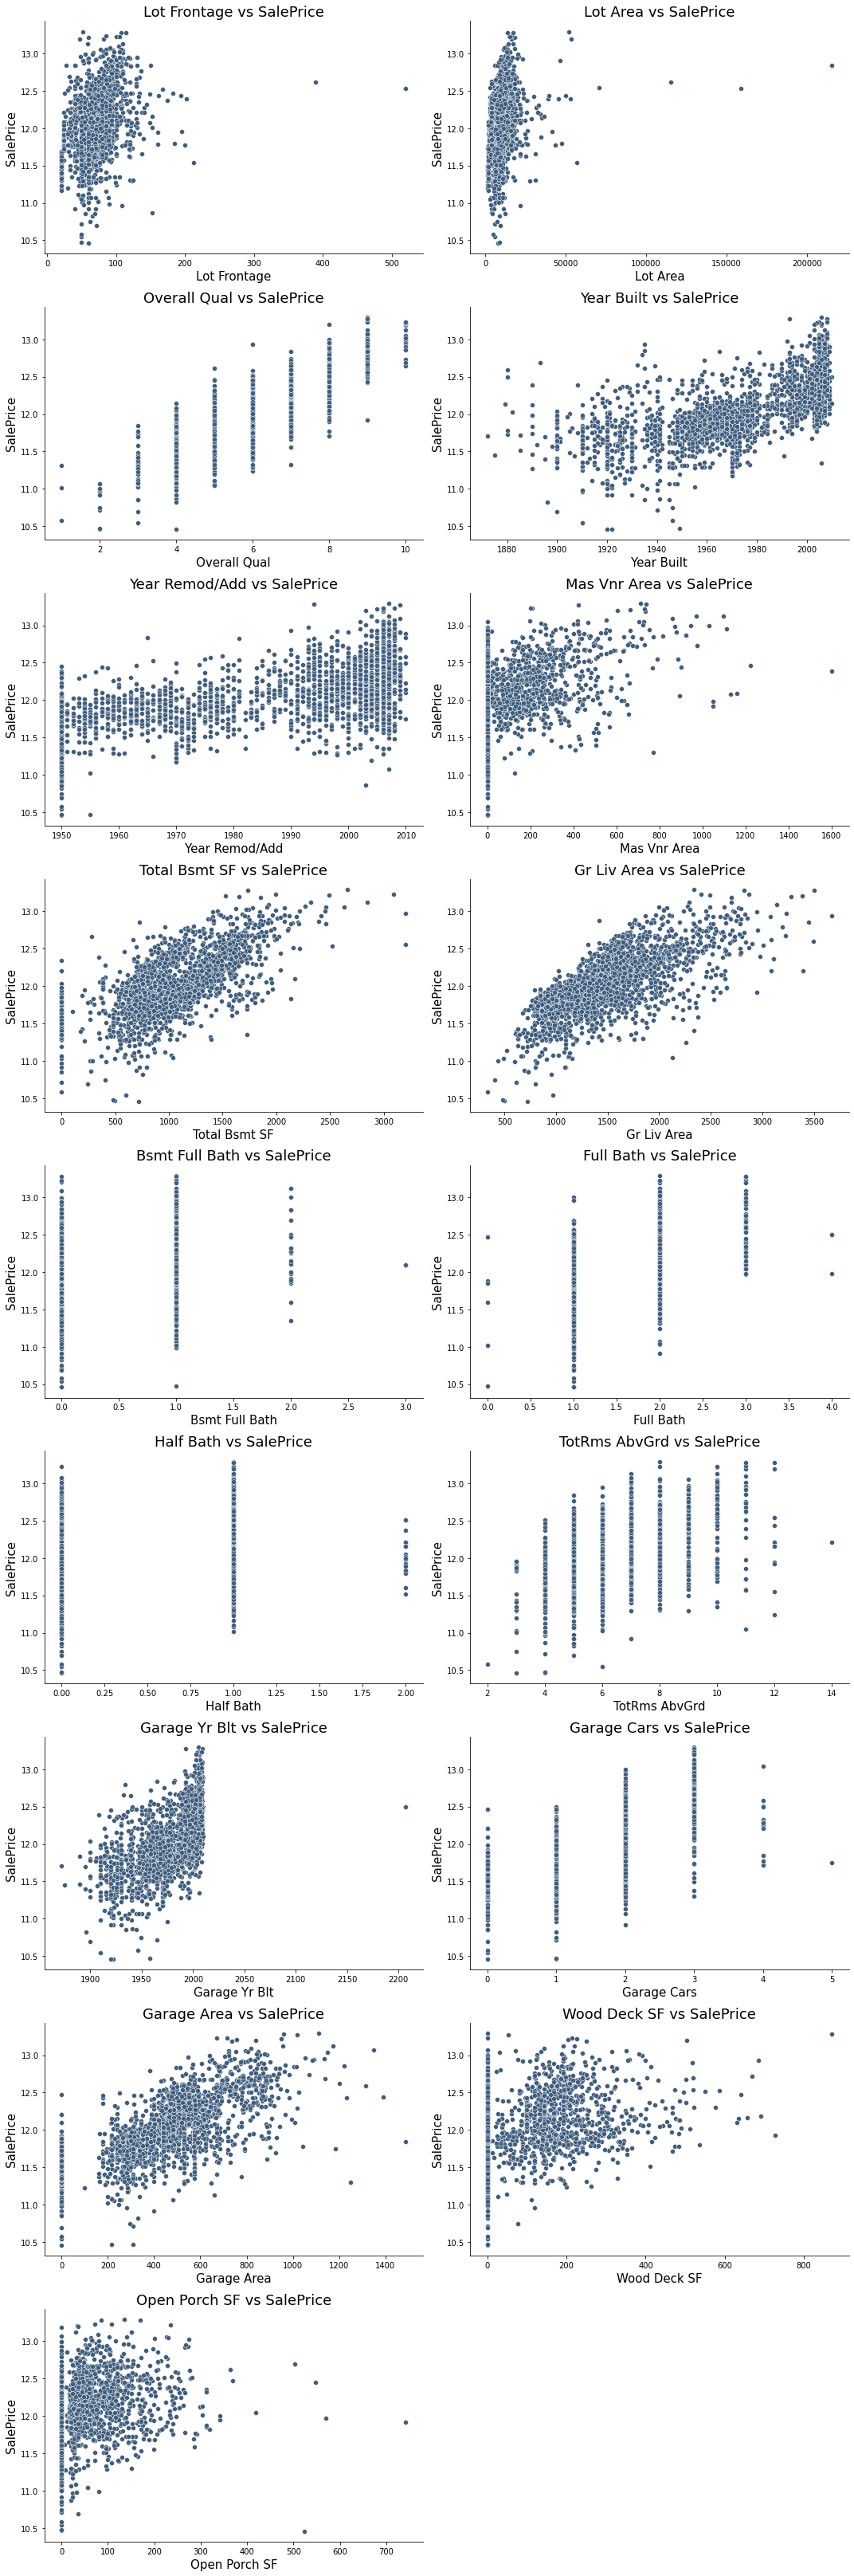

In [47]:
subplot_scatter(train,corr_features)

#### Filter the training dataset in order to include only categorical variables and numerical variables which have high linear relationship with target variable SalePrice.

In [48]:
Category = train.select_dtypes(include = 'object').columns

high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

corr_gt_25 = train.corr()[['SalePrice']][high_corr].index

In [49]:
train_clean = pd.concat([train[Category],train[corr_gt_25]],axis=1)

In [50]:
train_clean.head()

,MS Zoning,Street,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,...,Bsmt Full Bath,Full Bath,Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,RL,Pave,Reg,Lvl,SawyerW,Norm,Norm,1Fam,1Story,Gable,...,0.0,1,1,6,2007.0,2.0,576.0,0,178,11.976659
1,RL,Pave,IR1,Lvl,SawyerW,Norm,Norm,1Fam,1Story,Hip,...,0.0,2,0,7,1990.0,3.0,701.0,84,70,12.513190
2,RL,Pave,IR1,Lvl,Timber,Norm,Norm,1Fam,SLvl,Gable,...,0.0,1,0,7,1958.0,2.0,525.0,0,118,11.831379
3,RL,Pave,Reg,Lvl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,...,0.0,2,0,6,2008.0,2.0,539.0,192,42,12.423198
4,RL,Pave,IR1,Lvl,Gilbert,RRAn,Norm,1Fam,SLvl,Gable,...,0.0,2,1,7,2004.0,2.0,400.0,0,0,12.025749


In [51]:
train_clean.shape

(2188, 51)

In [52]:
# Separating "Numeric" and "Catogories" types

train_clean_numeric = train.select_dtypes(include = [np.number])

train_clean_object = train_clean.select_dtypes(include = 'object')

In [53]:
# One-hot-encode Encoding consists of transforming non-numerical data to an equivalent numerical form.

feature_def = gen_features(columns = train_clean_object.columns.tolist(), classes=[LabelBinarizer])

mapper5 = DataFrameMapper(feature_def,df_out=True)

object_df = mapper5.fit_transform(train_clean_object)

In [54]:
# New dataframe for pre-processing

house = pd.concat([train_clean_numeric, object_df], axis=1)

In [55]:
house.shape

(2188, 260)

In [56]:
house.head(2)

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,534,20,80.0,9605,7,6,2007,2007,0.0,1218.0,...,0,0,0,1,0,0,0,0,1,0
1,803,20,90.0,14684,7,7,1990,1991,234.0,2158.0,...,0,0,0,1,0,0,0,0,1,0


## Declare the X and the y

In [57]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

## Scale the data

In [58]:
# Create a scaler object

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

## Train Test Split

In [59]:
# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

### Declare the X and the y

# Evaluate model

In [60]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

In [69]:
house.columns

Index(['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=260)

### Scale the data

In [61]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

# Modeling

## Linear regression model

In [67]:
type(X_train)

numpy.ndarray

In [63]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

ln = LinearRegression()

ln.fit(X_train, y_train)

ln.score(X_train,y_train)

0.9436108200622351

In [65]:
y_pred_log = ln.predict(X_train)
y_pred = np.e ** (y_pred_log)
y_train_inverse_log = np.e ** (y_train)

print(metrics.mean_squared_error(y_train_inverse_log,y_pred,squared= False))
y_pred_log_test = ln.predict(X_test)
y_pred_test = np.e ** (y_pred_log_test)

#R2
metrics.mean_squared_error(np.e**(y_test),y_pred_test,squared= False)

17170.047367008956


26157.28413241149

In [ ]:
#predicting on the test set
from sklearn import metrics


predictions_ln = ln.predict(X_test_rf)


R2_score_ln = metrics.r2_score(y_test, predictions_ln)
R2_score_ln

In [ ]:
predictions_ln.shape

In [ ]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ln, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_train_rf, y_train)

print(optimal_lasso.alpha_)

In [ ]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_rf, y_train, cv=10)

lasso.fit(X_train_rf, y_train)

print(lasso_scores)
print(np.mean(lasso_scores))

In [ ]:
#predicting on the test set

predictions_lasso = lasso.predict(X_test_rf)

R2_score_lasso = metrics.r2_score(y_test, predictions_lasso)
R2_score_lasso

In [ ]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_lasso, actual_values, alpha= 0.75, color = 'r')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Lasso Regression')
plt.show()

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_rf, y_train)

print(optimal_ridge.alpha_)

In [ ]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_rf, y_train, cv=10)

ridge.fit(X_train_rf, y_train)

print(ridge_scores)
print(np.mean(ridge_scores))

In [ ]:
#predicting on the test set

predictions_ridge = ridge.predict(X_test_rf)

R2_score_ridge = metrics.r2_score(y_test, predictions_ridge)
R2_score_ridge

In [ ]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ridge, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Ridge Regression')
plt.show()

## ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
optimal_enet.fit(X_train_rf, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

In [ ]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train_rf, y_train, cv=10)

enet.fit(X_train_rf, y_train)

print(enet_scores)
print(np.mean(enet_scores))

In [ ]:
#predicting on the test set

predictions_enet = enet.predict(X_test_rf)

R2_score_enet = metrics.r2_score(y_test, predictions_enet)
R2_score_enet

In [ ]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_enet, actual_values, alpha= 0.75, color = 'g')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('ElasticNet Regression')
plt.show()

## Choosing the right model

In [ ]:
R2 = pd.DataFrame({'Linear Regression': [R2_score_ln], 'Ridge Regression': [R2_score_ridge], 'Lasso Regression': [R2_score_lasso], 
                  'ElasticNet Regression': [R2_score_enet]})

In [ ]:
R2.T.sort_values(0, ascending = False)

In [ ]:
R2.head()

# Predicting for train dataset

In [ ]:
predictions_lasso

# Submission

In [ ]:
train.head()

In [ ]:
test = pd.read_csv('datasets/test.csv', na_values = "", keep_default_na = False)
test

In [ ]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

In [ ]:
preds = predictions_enet(X)
preds

In [ ]:
## create dataframe with "Order" and prediction
predictions_lasso = pd.DataFrame({'Order':test['Order'], 'SalePrice':preds_test})
predictions_lasso

In [ ]:
## save to csv file for submission
## index = False
predictions_lasso(.to_csv('submission.csv', index=False)